In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
from wordcloud import WordCloud

from collections import Counter
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import pickle

## EXPLORATORY DATA ANALYSIS

### 1. Most common words

In [2]:
# Opening DTM
grouped_sotu_dtm = pd.read_pickle('./pickled_files/grouped_pres_speeches_dtm.pkl')
grouped_sotu_dtm.head()

,aa,aaa,aana,aaron,abandon,abandoned,abandoning,abandonment,abandons,abate,...,zimbabwe,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga,ôtil
president_name,,,,,,,,,,,,,,,,,,,,,
Abraham Lincoln,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Andrew Jackson,0,0,0,0,6,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
Andrew Johnson,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Barack Obama,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Benjamin Harrison,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Transposing dataframe
transposed_dtm = grouped_sotu_dtm.T
transposed_dtm.head()

president_name,Abraham Lincoln,Andrew Jackson,Andrew Johnson,Barack Obama,Benjamin Harrison,Calvin Coolidge,Chester A. Arthur,Donald J. Trump,Dwight D. Eisenhower,Franklin D. Roosevelt,...,Rutherford B. Hayes,Theodore Roosevelt,Thomas Jefferson,Ulysses S. Grant,Warren G. Harding,William Howard Taft,William J. Clinton,William McKinley,Woodrow Wilson,Zachary Taylor
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aana,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,0,0,0
abandon,1,6,1,2,1,3,0,1,1,5,...,1,9,0,3,0,3,2,1,0,1


In [10]:
# Creating a dictoinary of the top words for each president
top_words_freq_dict = {}
for president in transposed_dtm.columns:
    top = transposed_dtm[president].sort_values(ascending=False).head(100)
    top_words_freq_dict[president] = dict(top)
    
top_words_freq_dict

{'Abraham Lincoln': {'states': 150,
  'congress': 81,
  'united': 81,
  'government': 75,
  'people': 71,
  'year': 66,
  'war': 64,
  'country': 63,
  'great': 61,
  'shall': 52,
  'time': 51,
  'general': 50,
  'union': 50,
  'national': 49,
  'public': 48,
  'new': 45,
  'state': 43,
  'foreign': 37,
  'citizens': 37,
  'department': 36,
  'labor': 35,
  'service': 35,
  'secretary': 34,
  'subject': 33,
  'power': 31,
  'report': 31,
  'navy': 31,
  'attention': 31,
  'persons': 30,
  'increase': 29,
  'present': 28,
  'condition': 28,
  'emancipation': 27,
  'free': 27,
  'large': 27,
  'naval': 27,
  'treasury': 27,
  'law': 26,
  'men': 26,
  'number': 25,
  'plan': 23,
  'military': 23,
  'debt': 23,
  'act': 22,
  'far': 22,
  'nation': 22,
  'nations': 22,
  'consideration': 22,
  'receipts': 21,
  'make': 21,
  'slavery': 21,
  'claims': 20,
  'measures': 20,
  'session': 19,
  'means': 19,
  'good': 19,
  'way': 19,
  'land': 18,
  'army': 18,
  'proper': 18,
  'period': 18

In [11]:
# Printing out the top words for each president and how many times they appear
for president in top_words_freq_dict.keys():
    print(president)
    print('----------')
    for word, frequency in top_words_freq_dict[president].items():
        print(f'{word} : {frequency}')
    print('==========') 

Abraham Lincoln
----------
states : 150
congress : 81
united : 81
government : 75
people : 71
year : 66
war : 64
country : 63
great : 61
shall : 52
time : 51
general : 50
union : 50
national : 49
public : 48
new : 45
state : 43
foreign : 37
citizens : 37
department : 36
labor : 35
service : 35
secretary : 34
subject : 33
power : 31
report : 31
navy : 31
attention : 31
persons : 30
increase : 29
present : 28
condition : 28
emancipation : 27
free : 27
large : 27
naval : 27
treasury : 27
law : 26
men : 26
number : 25
plan : 23
military : 23
debt : 23
act : 22
far : 22
nation : 22
nations : 22
consideration : 22
receipts : 21
make : 21
slavery : 21
claims : 20
measures : 20
session : 19
means : 19
good : 19
way : 19
land : 18
army : 18
proper : 18
period : 18
purpose : 18
force : 18
lands : 18
including : 18
vessels : 17
indian : 17
leaving : 17
day : 17
effect : 17
trade : 17
possible : 17
proposed : 17
line : 17
proclamation : 17
capital : 17
interior : 17
rebellion : 16
important : 16
e

In [12]:
# # Finding the most commonly used words by each president
# top_words_dict = {}
# for col in transposed_dtm.columns:
#     top_word = transposed_dtm[col].sort_values(ascending=False).head(30)
#     top_words_dict[col] = list(zip(top_word.index, top_word.values))

# top_words_dict

In [13]:
# Getting the top 10 words for each president
for president in top_words_freq_dict.keys():
    print(president)
    print('----------')
    words = []
    for word, frequency in top_words_freq_dict[president].items():
        words.append(word)
    print(', '.join(words[:10]))
    print('==========')

Abraham Lincoln
----------
states, congress, united, government, people, year, war, country, great, shall
Andrew Jackson
----------
government, states, public, united, congress, country, people, present, subject, general
Andrew Johnson
----------
states, government, united, constitution, congress, people, war, country, year, great
Barack Obama
----------
america, new, people, jobs, american, ve, years, work, make, year
Benjamin Harrison
----------
states, government, year, united, congress, law, great, general, people, new
Calvin Coolidge
----------
government, country, congress, public, national, people, law, great, present, federal
Chester A. Arthur
----------
government, states, congress, year, united, secretary, country, present, attention, report
Donald J. Trump
----------
american, america, thank, new, country, people, americans, tonight, great, years
Dwight D. Eisenhower
----------
world, government, congress, federal, people, economic, year, program, military, security
Franklin

In [14]:
# Exctracting the top words for all presidents
words = []
for president in top_words_freq_dict.keys():
    top = [word for (word, count) in top_words_freq_dict[president].items()]
    for t in top:
        words.append(t)

In [15]:
words

['states',
 'congress',
 'united',
 'government',
 'people',
 'year',
 'war',
 'country',
 'great',
 'shall',
 'time',
 'general',
 'union',
 'national',
 'public',
 'new',
 'state',
 'foreign',
 'citizens',
 'department',
 'labor',
 'service',
 'secretary',
 'subject',
 'power',
 'report',
 'navy',
 'attention',
 'persons',
 'increase',
 'present',
 'condition',
 'emancipation',
 'free',
 'large',
 'naval',
 'treasury',
 'law',
 'men',
 'number',
 'plan',
 'military',
 'debt',
 'act',
 'far',
 'nation',
 'nations',
 'consideration',
 'receipts',
 'make',
 'slavery',
 'claims',
 'measures',
 'session',
 'means',
 'good',
 'way',
 'land',
 'army',
 'proper',
 'period',
 'purpose',
 'force',
 'lands',
 'including',
 'vessels',
 'indian',
 'leaving',
 'day',
 'effect',
 'trade',
 'possible',
 'proposed',
 'line',
 'proclamation',
 'capital',
 'interior',
 'rebellion',
 'important',
 'end',
 'slave',
 'received',
 'long',
 'years',
 'powers',
 'south',
 'operations',
 'actual',
 'revenue',

In [16]:
# Aggregating list and identifying the most common words along with how many speeches they occur in
Counter(words).most_common()

[('states', 43),
 ('congress', 43),
 ('time', 43),
 ('government', 42),
 ('year', 42),
 ('country', 42),
 ('great', 42),
 ('new', 42),
 ('people', 41),
 ('united', 40),
 ('war', 39),
 ('power', 39),
 ('state', 37),
 ('national', 36),
 ('act', 36),
 ('make', 35),
 ('years', 35),
 ('public', 34),
 ('nations', 34),
 ('shall', 33),
 ('nation', 33),
 ('present', 32),
 ('law', 32),
 ('peace', 32),
 ('american', 32),
 ('foreign', 31),
 ('good', 31),
 ('citizens', 29),
 ('necessary', 29),
 ('general', 28),
 ('service', 28),
 ('policy', 28),
 ('long', 26),
 ('world', 26),
 ('subject', 25),
 ('consideration', 25),
 ('important', 24),
 ('laws', 24),
 ('commerce', 24),
 ('work', 24),
 ('trade', 23),
 ('attention', 22),
 ('increase', 22),
 ('means', 22),
 ('department', 21),
 ('treasury', 21),
 ('interests', 21),
 ('large', 20),
 ('military', 20),
 ('far', 20),
 ('right', 20),
 ('report', 19),
 ('treaty', 19),
 ('duty', 19),
 ('relations', 19),
 ('just', 19),
 ('federal', 19),
 ('union', 18),
 ('fr

In [19]:
# We want to exclude words that occur in more than half of the speeches
most_common_words = [word for word, count in Counter(words).most_common() if count >  len(transposed_dtm.columns)/2]
# We'll also add some common words that we don't want to include in our analysis
common_words = ['america', 'americas', 'americans', 'applause']

added_stop_words = most_common_words + common_words

# added_stop_words = [word for word, count in Counter(words).most_common() if count > 20]
# added_stop_words = added_stop_words + ['america', 'american', 'nation', 'world', 'people', 'years', 'new', 'time', 'work', 'must', 'today', 'us', 'let', 'make', 'know', 'great', 'come', 'every', 'day', 'way']
added_stop_words

['states',
 'congress',
 'time',
 'government',
 'year',
 'country',
 'great',
 'new',
 'people',
 'united',
 'war',
 'power',
 'state',
 'national',
 'act',
 'make',
 'years',
 'public',
 'nations',
 'shall',
 'nation',
 'present',
 'law',
 'peace',
 'american',
 'foreign',
 'good',
 'citizens',
 'necessary',
 'general',
 'service',
 'policy',
 'long',
 'world',
 'subject',
 'consideration',
 'important',
 'laws',
 'commerce',
 'work',
 'trade',
 'attention',
 'increase',
 'means',
 'america',
 'americas',
 'americans',
 'applause']

In [20]:
# Updating the document-term matrix with the new list of stop words

# Read in cleaned data
data_clean = pd.read_pickle('./pickled_files/clean_sotu_speeches.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(added_stop_words)
stop_words = list(stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.clean_text)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickling it for later use
pickle.dump(cv, open("./pickled_files/cv_stop.pkl", "wb"))
data_stop.to_pickle("./pickled_files/dtm_stop.pkl")

In [21]:
# Converting stop words to a list
stop_words = list(stop_words)
stop_words

['beforehand',
 'above',
 'move',
 'latter',
 'across',
 'those',
 'before',
 'becomes',
 'him',
 'themselves',
 'thereby',
 'would',
 'why',
 'itself',
 'ten',
 'couldnt',
 'somehow',
 'even',
 'few',
 'etc',
 'being',
 'further',
 'among',
 'thick',
 'mine',
 'show',
 'your',
 'attention',
 'found',
 'herein',
 'must',
 'out',
 'one',
 'do',
 'under',
 'other',
 'yourself',
 'whereby',
 'although',
 'only',
 'serious',
 're',
 'sometimes',
 'therein',
 'co',
 'can',
 'hereafter',
 'describe',
 'what',
 'beside',
 'who',
 'made',
 'trade',
 'put',
 'policy',
 'least',
 'toward',
 'years',
 'then',
 'peace',
 'beyond',
 'alone',
 'all',
 'becoming',
 'after',
 'become',
 'people',
 'always',
 'whole',
 'world',
 'noone',
 'afterwards',
 'americans',
 'over',
 'twelve',
 'of',
 'latterly',
 'hereby',
 'con',
 'many',
 'service',
 'hers',
 'thence',
 'good',
 'general',
 'along',
 'state',
 'others',
 'everything',
 'that',
 'nobody',
 'first',
 'amount',
 'hundred',
 'whither',
 'wherea

In [22]:
# First, we'll remove the stop words from the frequency dictionary
for president in top_words_freq_dict.keys():
    for word in list(top_words_freq_dict[president].keys()):
        if word in stop_words:
            top_words_freq_dict[president].pop(word)

In [23]:
top_words_freq_dict

{'Abraham Lincoln': {'union': 50,
  'department': 36,
  'labor': 35,
  'secretary': 34,
  'report': 31,
  'navy': 31,
  'persons': 30,
  'condition': 28,
  'emancipation': 27,
  'free': 27,
  'large': 27,
  'naval': 27,
  'treasury': 27,
  'men': 26,
  'number': 25,
  'plan': 23,
  'military': 23,
  'debt': 23,
  'far': 22,
  'receipts': 21,
  'slavery': 21,
  'claims': 20,
  'measures': 20,
  'session': 19,
  'way': 19,
  'land': 18,
  'army': 18,
  'proper': 18,
  'period': 18,
  'purpose': 18,
  'force': 18,
  'lands': 18,
  'including': 18,
  'vessels': 17,
  'indian': 17,
  'leaving': 17,
  'day': 17,
  'effect': 17,
  'possible': 17,
  'proposed': 17,
  'line': 17,
  'proclamation': 17,
  'capital': 17,
  'interior': 17,
  'rebellion': 16,
  'end': 16,
  'slave': 16,
  'received': 16,
  'powers': 16,
  'south': 16,
  'operations': 16,
  'actual': 16,
  'revenue': 16,
  'believed': 16,
  'especially': 15,
  'organized': 15,
  'sum': 15,
  'civil': 15,
  'white': 15,
  'authority':

In [24]:
# Let's make some word clouds!
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

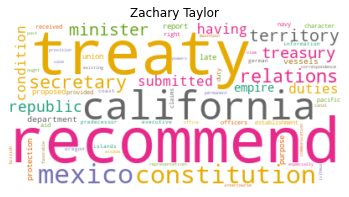

In [26]:
# Let's make some word clouds!
full_name = []

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
for president in top_words_freq_dict.keys():
    wc.generate_from_frequencies(top_words_freq_dict[president])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(president)
    plt.savefig(f'./figures/word_cloud_{president}.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
full_names = []

# Creating a new word cloud for each president
for index, president in enumerate(transposed_dtm.columns):
    wc.generate_from_frequencies(top_words_freq_dict[president])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(president)
    plt.savefig(f'figures/word_cloud_{president}.png', dpi=300)
plt.show()

### 2. Unique words

In [27]:
# Finding the number of unique words that each president uses
# Identifing the non-zero items in the document-term matrix, meaning that the word occurs at least once
full_names = []
unique_list = []
for president in transposed_dtm.columns:
    uniques = transposed_dtm[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)
    full_names.append(president)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president_name', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.head(15)

,president_name,unique_words
23,John Adams,1419
42,Zachary Taylor,1562
22,Jimmy Carter,1830
13,George Washington,2014
37,Warren G. Harding,2202
31,Richard Nixon,2248
14,Gerald R. Ford,2312
11,George Bush,2664
35,Thomas Jefferson,2705
24,John F. Kennedy,2962


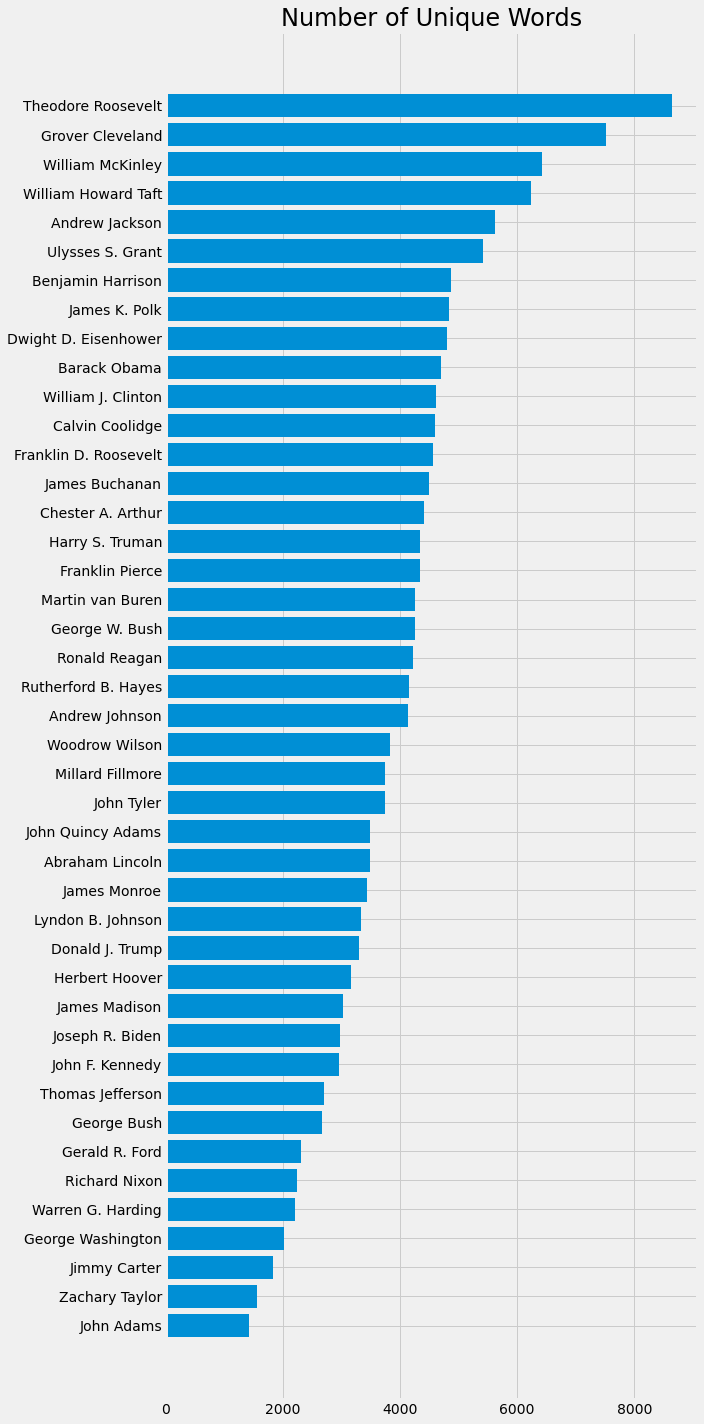

In [31]:
# Plotting results
# Using 538 colors
plt.style.use('fivethirtyeight')

plt.subplots(figsize=(10,20))
y_pos = np.arange(len(data_words))
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.president_name)
plt.title('Number of Unique Words', fontsize=24)
plt.tight_layout()
plt.savefig('figures/unique_words.png', dpi=600)